In [1]:
import pandas as pd

In [2]:
FluTrain = pd.read_csv('FluTrain.csv')

In [3]:
FluTrain.head()

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


####  Looking at the time period 2004-2011, which week corresponds to the highest percentage of ILI-related physician visits?

18-Oct-2009

In [4]:
FluTrain['ILI'].idxmax()

302

In [5]:
FluTrain.loc[FluTrain['ILI'].idxmax()]

Week       2009-10-18 - 2009-10-24
ILI                        7.61889
Queries                          1
Name: 302, dtype: object

#### Which week corresponds to the highest percentage of ILI-related query fraction?

In [6]:
FluTrain.loc[FluTrain['Queries'].idxmax()]

Week       2009-10-18 - 2009-10-24
ILI                        7.61889
Queries                          1
Name: 302, dtype: object

In [7]:
FluTrain.dtypes

Week        object
ILI        float64
Queries    float64
dtype: object

#### Let us now understand the data at an aggregate level. Plot the histogram of the dependent variable, ILI. What best describes the distribution of values of ILI?

- Most of the ILI values are small, with a relatively small number of much larger values (in statistics, this sort of data is called "skew right").
- The ILI values are balanced, with equal numbers of unusually large and unusually small values.
- Most of the ILI values are large, with a relatively small number of much smaller values (in statistics, this sort of data is called "skew left").

*Most of the ILI values are small, with a relatively small number of much larger values (in statistics, this sort of data is called "skew right").*

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

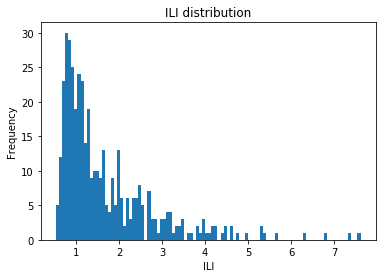

In [9]:
plt.hist(FluTrain['ILI'], bins = 100)
plt.xlabel("ILI")
plt.ylabel('Frequency')
plt.title('ILI distribution')

#### When handling a skewed dependent variable, it is often useful to predict the logarithm of the dependent variable instead of the dependent variable itself -- this prevents the small number of unusually large or small observations from having an undue influence on the sum of squared errors of predictive models. In this problem, we will predict the natural log of the ILI variable.

#### Plot the natural logarithm of ILI versus Queries. What does the plot suggest?.

- There is a negative, linear relationship between log(ILI) and Queries.
- There is no apparent linear relationship between log(ILI) and Queries.
- There is a positive, linear relationship between log(ILI) and Queries.

*There is a positive, linear relationship between log(ILI) and Queries.*

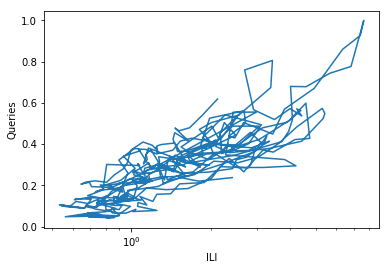

In [10]:
#plt.plot(x=FluTrain['ILI'], y = FluTrain['Queries'])
fig = plt.figure()
ax = plt.gca()
ax.plot(FluTrain['ILI'], FluTrain['Queries'])
ax.set_xscale('log')
plt.xlabel('ILI')
plt.ylabel('Queries')

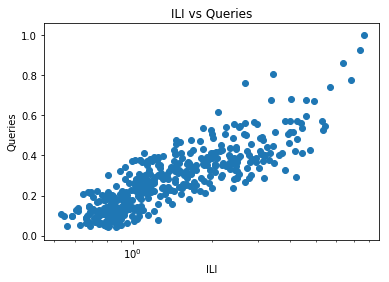

In [11]:
plt.scatter(FluTrain['ILI'], FluTrain['Queries'])
plt.xscale('log')
plt.xlabel('ILI')
plt.ylabel('Queries')
plt.title('ILI vs Queries')

#### Based on the plot we just made, it seems that a linear regression model could be a good modeling choice. Based on our understanding of the data from the previous subproblem, which model best describes our estimation problem?

- ILI = intercept + coefficient x Queries, where the coefficient is negative
- Queries = intercept + coefficient x ILI, where the coefficient is negative
- ILI = intercept + coefficient x Queries, where the coefficient is positive
- Queries = intercept + coefficient x ILI, where the coefficient is positive
- log(ILI) = intercept + coefficient x Queries, where the coefficient is negative
- Queries = intercept + coefficient x log(ILI), where the coefficient is negative
- log(ILI) = intercept + coefficient x Queries, where the coefficient is positive
- Queries = intercept + coefficient x log(ILI), where the coeffcient is positive

*log(ILI) = intercept + coefficient x Queries, where the coefficient is positive*

In [12]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()

In [13]:
import numpy as np

In [14]:
X_train = FluTrain['Queries'].values.reshape((len(FluTrain['Queries']), 1))
y_train = pd.DataFrame(np.log(FluTrain['ILI']))
#linear_regression.fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)

(417, 1)
(417, 1)


In [15]:
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
linear_regression.residues_

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


array([ 37.23120641])

\begin{equation*}
SSE (Sum of Squared Errors)   = 37.23120641
\end{equation*}

In [17]:
import math

In [18]:
RMSE = math.sqrt(linear_regression.residues_[0] / len(FluTrain))
RMSE

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


0.29880339458256205

\begin{equation*}
RMSE (Root Mean Squared Error)   = 0.29880339458256205
\end{equation*}

#### What is the training set R-squared value for FluTrend1 model (the "Multiple R-squared")?

0.709020055

In [19]:
linear_regression.score(X_train, y_train)

0.70902005534818646

\begin{equation*}
R^2   = 0.709020055
\end{equation*}

#### For a single variable linear regression model, there is a direct relationship between the R-squared and the correlation between the independent and the dependent variables. What is the relationship we infer from our problem? 

- R-squared = Correlation^2
- R-squared = log(1/Correlation)
- R-squared = exp(-0.5*Correlation)

*R-squared = Correlation^2*

In [20]:
FluTrain['ILI'].corr(FluTrain['Queries'])

0.81421151130322911

In [21]:
FluTrain['Queries'].corr(np.log(FluTrain['ILI']))

0.84203328636591723

In [22]:
FluTrain.corr()

,ILI,Queries
ILI,1.000000,0.814212
Queries,0.814212,1.000000


In [23]:
from scipy.stats.stats import pearsonr
print(pearsonr(X_train, y_train))

(array([ 0.84203329]), array([  2.62109684e-113]))


In [24]:
correlation_squared = .842033286 * .842033286
correlation_squared

0.7090200547319578

#### This is close to the R^2 value

***

#### The csv file FluTest.csv provides the 2012 weekly data of the ILI-related search queries and the observed weekly percentage of ILI-related physician visits.

#### Normally, we would obtain test-set predictions from the model 'linear_regression' using the code

    linear_regression.predict()

#### However, the dependent variable in our model is log(ILI), so predicted_values would contain predictions of the log(ILI) value. We are instead interested in obtaining predictions of the ILI value. We can convert from predictions of log(ILI) to predictions of ILI via exponentiation, or the exp() function. The new code, which predicts the ILI value, is

np.exp(linear_regression.predict(X_test))

#### What is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012? 

In [25]:
FluTest = pd.read_csv('FluTest.csv')

In [26]:
X_test = FluTest['Queries'].values.reshape((len(FluTest['Queries']), 1))
y_test = pd.DataFrame(np.log(FluTest['ILI']))
#linear_regression.fit(X_train, y_train)
print(X_test.shape)
print(y_test.shape)

(52, 1)
(52, 1)


In [27]:
predicted_values = np.exp(linear_regression.predict(X_test))

In [28]:
FluTest.head(15)

,Week,ILI,Queries
0,2012-01-01 - 2012-01-07,1.766707,0.593625
1,2012-01-08 - 2012-01-14,1.543401,0.499336
2,2012-01-15 - 2012-01-21,1.647615,0.500664
3,2012-01-22 - 2012-01-28,1.684297,0.479416
4,2012-01-29 - 2012-02-04,1.863542,0.471448
5,2012-02-05 - 2012-02-11,1.864079,0.503320
6,2012-02-12 - 2012-02-18,2.019927,0.513944
7,2012-02-19 - 2012-02-25,2.103851,0.500664
8,2012-02-26 - 2012-03-03,2.095549,0.460823
9,2012-03-04 - 2012-03-10,2.103983,0.458167


In [29]:
FluTest.loc[FluTest['Week'] == '2012-03-11 - 2012-03-17']

,Week,ILI,Queries
10,2012-03-11 - 2012-03-17,2.293422,0.432935


In [30]:
predicted_values[10]

array([ 2.18737772])

***

#### What is the relative error betweeen the estimate (our prediction) and the observed value for the week of March 11, 2012? Note that the relative error is calculated as,

<br>

<font color = 'green'> (Observed ILI - Estimated ILI)/Observed ILI </font>

In [31]:
relative_error = (2.293422 - 2.18737772) / 2.293422
relative_error

0.04623845066455274

#### What is the Root Mean Square Error (RMSE) between our estimates and the actual observations for the percentage of ILI-related physician visits, on the test set?

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(np.exp(y_test), predicted_values)
print("Mean squared error: ", mse)

Mean squared error:  0.561097665762


In [34]:
rmse = math.sqrt(mean_squared_error(np.exp(y_test), predicted_values))
print("Root mean squared error: ", rmse)

Root mean squared error:  0.7490645271019668


#### Alternatively, it can be calculated as follows:

The RMSE can be calculated by first computing the SSE:

SSE = sum((predictedValues-FluTest['ILI'])^2)

and then dividing by the number of observations and taking the square root:

RMSE = sqrt(SSE / len(FluTest))

In other words, sqrt(sum((predictedValues - FluTest['ILI'])^2))

***

#### The observations in this dataset are consecutive weekly measurements of the dependent and independent variables. This sort of dataset is called a "time series." Often, statistical models can be improved by predicting the current value of the dependent variable using the value of the dependent variable from earlier weeks. In our models, this means we will predict the ILI variable in the current week using values of the ILI variable from previous weeks.

#### First, we need to decide the amount of time to lag the observations. Because the ILI variable is reported with a 1- or 2-week lag, a decision maker cannot rely on the previous week's ILI value to predict the current week's value. Instead, the decision maker will only have data available from 2 or more weeks ago. We will build a variable called ILI_Lag_2_Weeks that contains the ILI value from 2 weeks before the current observation.

In [35]:
FluTrain.head(10)

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436
5,2004-02-08 - 2004-02-14,1.324274,0.207171
6,2004-02-15 - 2004-02-21,1.307257,0.241700
7,2004-02-22 - 2004-02-28,1.036977,0.216467
8,2004-02-29 - 2004-03-06,1.010320,0.225764
9,2004-03-07 - 2004-03-13,1.052492,0.199203


In [36]:
FluTrain.dtypes

Week        object
ILI        float64
Queries    float64
dtype: object

In [37]:
FluTrain['Week_Time_Series'] = pd.to_datetime(FluTrain['Week'])

In [38]:
FluTrain.dtypes

Week                        object
ILI                        float64
Queries                    float64
Week_Time_Series    datetime64[ns]
dtype: object

In [50]:
FluTrain.head()

,Week,ILI,Queries,Week_Time_Series
0,2004-01-04 - 2004-01-10,2.418331,0.237716,2004-01-05 06:04:00
1,2004-01-11 - 2004-01-17,1.809056,0.220452,2004-01-12 13:04:00
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2004-01-19 20:04:00
3,2004-01-25 - 2004-01-31,1.542495,0.237716,2004-01-27 03:04:00
4,2004-02-01 - 2004-02-07,1.437868,0.224436,2004-02-02 03:04:00


In [40]:
FluTrain2 = pd.read_csv('FluTrain.csv', parse_dates=[0])

In [41]:
FluTrain2.head()

,Week,ILI,Queries
0,2004-01-05 06:04:00,2.418331,0.237716
1,2004-01-12 13:04:00,1.809056,0.220452
2,2004-01-19 20:04:00,1.712024,0.225764
3,2004-01-27 03:04:00,1.542495,0.237716
4,2004-02-02 03:04:00,1.437868,0.224436


In [42]:
FluTrain2.dtypes

Week       datetime64[ns]
ILI               float64
Queries           float64
dtype: object

In [49]:
FluTrain3 = pd.read_csv('FluTrain.csv')
FluTrain3['Week'].astype(str).str.split(' - ', 1, expand = True).rename(columns = {0:'Start_Date', 1 : 'End_Date'}).head()

,Start_Date,End_Date
0,2004-01-04,2004-01-10
1,2004-01-11,2004-01-17
2,2004-01-18,2004-01-24
3,2004-01-25,2004-01-31
4,2004-02-01,2004-02-07


In [51]:
FluTrain[['Start_Date',  'End_Date']] = FluTrain['Week'].astype(str).str.split(' - ', 1, expand = True)

In [52]:
FluTrain.head()

,Week,ILI,Queries,Week_Time_Series,Start_Date,End_Date
0,2004-01-04 - 2004-01-10,2.418331,0.237716,2004-01-05 06:04:00,2004-01-04,2004-01-10
1,2004-01-11 - 2004-01-17,1.809056,0.220452,2004-01-12 13:04:00,2004-01-11,2004-01-17
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2004-01-19 20:04:00,2004-01-18,2004-01-24
3,2004-01-25 - 2004-01-31,1.542495,0.237716,2004-01-27 03:04:00,2004-01-25,2004-01-31
4,2004-02-01 - 2004-02-07,1.437868,0.224436,2004-02-02 03:04:00,2004-02-01,2004-02-07


In [53]:
FluTrain.dtypes

Week                        object
ILI                        float64
Queries                    float64
Week_Time_Series    datetime64[ns]
Start_Date                  object
End_Date                    object
dtype: object

In [54]:
FluTrain['Start_Date'] = pd.to_datetime(FluTrain['Start_Date'])

In [56]:
FluTrain['End_Date'] = pd.to_datetime(FluTrain['End_Date'])

In [57]:
FluTrain.dtypes

Week                        object
ILI                        float64
Queries                    float64
Week_Time_Series    datetime64[ns]
Start_Date          datetime64[ns]
End_Date            datetime64[ns]
dtype: object

In [58]:
FluTrain.head()

,Week,ILI,Queries,Week_Time_Series,Start_Date,End_Date
0,2004-01-04 - 2004-01-10,2.418331,0.237716,2004-01-05 06:04:00,2004-01-04,2004-01-10
1,2004-01-11 - 2004-01-17,1.809056,0.220452,2004-01-12 13:04:00,2004-01-11,2004-01-17
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2004-01-19 20:04:00,2004-01-18,2004-01-24
3,2004-01-25 - 2004-01-31,1.542495,0.237716,2004-01-27 03:04:00,2004-01-25,2004-01-31
4,2004-02-01 - 2004-02-07,1.437868,0.224436,2004-02-02 03:04:00,2004-02-01,2004-02-07


In [59]:
offset = pd.Timedelta(2, 'W')

In [60]:
sample_date = pd.to_datetime('2018-10-05')

In [61]:
sample_date + offset

Timestamp('2018-10-19 00:00:00')

In [62]:
sample_date - offset

Timestamp('2018-09-21 00:00:00')

In [63]:
FluTrain['Start_Date_Offset_2_Weeks'] = FluTrain['Start_Date'].shift(2)

In [64]:
FluTrain.head()

,Week,ILI,Queries,Week_Time_Series,Start_Date,End_Date,Start_Date_Offset_2_Weeks
0,2004-01-04 - 2004-01-10,2.418331,0.237716,2004-01-05 06:04:00,2004-01-04,2004-01-10,NaT
1,2004-01-11 - 2004-01-17,1.809056,0.220452,2004-01-12 13:04:00,2004-01-11,2004-01-17,NaT
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2004-01-19 20:04:00,2004-01-18,2004-01-24,2004-01-04
3,2004-01-25 - 2004-01-31,1.542495,0.237716,2004-01-27 03:04:00,2004-01-25,2004-01-31,2004-01-11
4,2004-02-01 - 2004-02-07,1.437868,0.224436,2004-02-02 03:04:00,2004-02-01,2004-02-07,2004-01-18


In [65]:
FluTrain['End_Date_Offset_2_Weeks'] = FluTrain['End_Date'].shift(2)

In [66]:
FluTrain.head()

,Week,ILI,Queries,Week_Time_Series,Start_Date,End_Date,Start_Date_Offset_2_Weeks,End_Date_Offset_2_Weeks
0,2004-01-04 - 2004-01-10,2.418331,0.237716,2004-01-05 06:04:00,2004-01-04,2004-01-10,NaT,NaT
1,2004-01-11 - 2004-01-17,1.809056,0.220452,2004-01-12 13:04:00,2004-01-11,2004-01-17,NaT,NaT
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2004-01-19 20:04:00,2004-01-18,2004-01-24,2004-01-04,2004-01-10
3,2004-01-25 - 2004-01-31,1.542495,0.237716,2004-01-27 03:04:00,2004-01-25,2004-01-31,2004-01-11,2004-01-17
4,2004-02-01 - 2004-02-07,1.437868,0.224436,2004-02-02 03:04:00,2004-02-01,2004-02-07,2004-01-18,2004-01-24


In [67]:
FluTrain['ILI_Lag_2_Weeks'] = FluTrain['ILI'].shift(2)

In [68]:
FluTrain.head()

,Week,ILI,Queries,Week_Time_Series,Start_Date,End_Date,Start_Date_Offset_2_Weeks,End_Date_Offset_2_Weeks,ILI_Lag_2_Weeks
0,2004-01-04 - 2004-01-10,2.418331,0.237716,2004-01-05 06:04:00,2004-01-04,2004-01-10,NaT,NaT,NaN
1,2004-01-11 - 2004-01-17,1.809056,0.220452,2004-01-12 13:04:00,2004-01-11,2004-01-17,NaT,NaT,NaN
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2004-01-19 20:04:00,2004-01-18,2004-01-24,2004-01-04,2004-01-10,2.418331
3,2004-01-25 - 2004-01-31,1.542495,0.237716,2004-01-27 03:04:00,2004-01-25,2004-01-31,2004-01-11,2004-01-17,1.809056
4,2004-02-01 - 2004-02-07,1.437868,0.224436,2004-02-02 03:04:00,2004-02-01,2004-02-07,2004-01-18,2004-01-24,1.712024


#### How many values are missing in the new ILILag2 variable?

2

***

#### Plot the log of ILI_Lag_2_Weeks against the log of ILI. Which best describes the relationship between these two variables?

- There is a strong negative relationship between log(ILILag2) and log(ILI).
- This is a weak or no relationship between log(ILILag2) and log(ILI)
- There is a strong positive relationship between log(ILILag2) and log(ILI)

*There is a strong positive relationship between log(ILILag2) and log(ILI)*

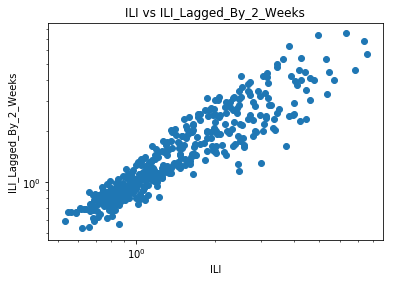

In [69]:
plt.scatter(FluTrain['ILI'], FluTrain['ILI_Lag_2_Weeks'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ILI')
plt.ylabel('ILI_Lagged_By_2_Weeks')
plt.title('ILI vs ILI_Lagged_By_2_Weeks')

***

#### Train a linear regression model on the FluTrain dataset to predict the log of the ILI variable using the Queries variable as well as the log of the ILILag2 variable.

#### Which coefficients are significant at the p=0.05 level in this regression model? (Select all that apply.)

- Intercept
- Queries
- log(ILI_Lag_2_Weeks)

*All of them are significant*



#### What is the R^2 value of the FluTrend2 model?

0.906

In [70]:
FluTrain_Model_4 = FluTrain[['ILI', 'Queries', 'ILI_Lag_2_Weeks']]

In [71]:
FluTrain_Model_4.head()

,ILI,Queries,ILI_Lag_2_Weeks
0,2.418331,0.237716,NaN
1,1.809056,0.220452,NaN
2,1.712024,0.225764,2.418331
3,1.542495,0.237716,1.809056
4,1.437868,0.224436,1.712024


In [76]:
import statsmodels.api as sm

FluTrain_Model_4 = FluTrain_Model_4.dropna()

X_train_model_4 = FluTrain_Model_4[['Queries']] #, 'ILI_Lag_2_Weeks']].values.reshape(len(FluTrain_Model_4['Queries']), 1)

X_train_model_4['Log_ILI_Lag_2_Weeks'] = pd.DataFrame(np.log(FluTrain_Model_4['ILI_Lag_2_Weeks']))

y_train_model_4 = pd.DataFrame(np.log(FluTrain_Model_4['ILI']))

X = sm.add_constant(X_train_model_4)

model = sm.OLS(y_train_model_4, X).fit()

model.summary()

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ILI   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sun, 21 Oct 2018   Prob (F-statistic):          1.38e-212
Time:                        08:27:52   Log-Likelihood:                 147.24
No. Observations:                 415   AIC:                            -288.5
Df Residuals:                     412   BIC:                            -276.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2406      0.020    -12.321      0.000      -0.279      -0.202
Queries                 1.2558      0.079     15.876      0.000       1.100       1.411
Log_ILI_Lag_2_Weeks     0.6557      0.023     29.135      0.000       0.611       0.700
==============================================================================
Omnibus:                       74.791   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.402
Skew:                           0.950   Prob(JB):                     2.43e-35
Kurtosis:                       5.368   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### On the basis of R-squared value and significance of coefficients, which statement is the most accurate?

- Due to overfitting, FluTrend2 is a weaker model than the first model we used on the training set.
- FluTrain_Model_4 is about the same quality as the first model we used on the training set.
- FluTrain_Model_4 is a stronger model than the first model we used on the training set.

*FluTrain_Model_4 is a stronger model than the first model we used on the training set.*

#### Resources:

- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
- https://www.siyavula.com/read/maths/grade-11/statistics/11-statistics-05
- http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
- http://www.endmemo.com/program/R/exp.php
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp2.html
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html
- http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
- http://northstar-www.dartmouth.edu/doc/idl/html_6.2/Time-Series_Analysis.html
- http://pandas.pydata.org/pandas-docs/stable/timeseries.html
- https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Lag
- https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea
- https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
- https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan